In [1]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats


# Preprocessing libraries and evaluating libaries
from sklearn.preprocessing import  RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, ConfusionMatrixDisplay

# import alogorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Statistical libraries
from scipy import stats
from scipy.stats import zscore, skew

# libariies for fine tuning 
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

#libaries for saving 
import joblib


print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# load dataset through url
url = r"C:\Users\ncc\Downloads\earthquake_alert_balanced_dataset.csv"
df = pd.read_csv(url)

print("Dataset loaded sucessfuly")

Dataset loaded sucessfuly


In [3]:
# check basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1300 non-null   float64
 1   depth      1300 non-null   float64
 2   cdi        1300 non-null   float64
 3   mmi        1300 non-null   float64
 4   sig        1300 non-null   float64
 5   alert      1300 non-null   object 
dtypes: float64(5), object(1)
memory usage: 61.1+ KB


In [4]:
#check the shape of the data
df.shape

(1300, 6)

In [5]:
# check a view of dataset
df.head()

,magnitude,depth,cdi,mmi,sig,alert
0,7.0,14.0,8.0,7.0,0.0,green
1,6.9,25.0,4.0,4.0,-33.0,green
2,7.0,579.0,3.0,3.0,-13.0,green
3,7.3,37.0,5.0,5.0,65.0,green
4,6.6,624.0,0.0,2.0,-98.0,green


In [6]:
#check for missing values
df.isna().sum()

magnitude    0
depth        0
cdi          0
mmi          0
sig          0
alert        0
dtype: int64

In [7]:
#check for duplicate values
df.duplicated().sum()

np.int64(44)

In [8]:
# drop duplicate values
df.drop_duplicates(inplace=True)

In [9]:
# check unique values in our target 
df["alert"].unique()

array(['green', 'yellow', 'orange', 'red'], dtype=object)

In [10]:
# check class imbalancce
df["alert"].value_counts()

alert
green     322
yellow    318
orange    316
red       300
Name: count, dtype: int64

----------------------------------------------------------------
 ### **1.Premliminary Data Analysis **
 ---------------------------------------------------------------

In [11]:
# get the descriptive analysis of the numerical columns
def pda_num_col(df):
    """ Descriptive analysis for numerical column"""
    """
    Parameter: Dataframe
    Return: Descriptive Analysis Table
    """
    num_col = df.select_dtypes(include=["float64","int64"]).columns
    return df[num_col].describe()

In [12]:
# apply the function to data
pda_num_col(df)


,magnitude,depth,cdi,mmi,sig
count,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000
mean,7.060796,51.316879,6.960191,6.917994,-10.404459
std,0.423277,105.899870,2.245138,1.363892,62.370941
min,6.500000,2.000000,0.000000,1.000000,-128.000000
25%,6.710000,12.000000,6.000000,6.000000,-55.000000
50%,6.995000,19.000000,8.000000,7.000000,-8.000000
75%,7.300000,38.000000,8.000000,8.000000,31.000000
max,8.600000,670.000000,9.000000,9.000000,127.000000


In [13]:
# Let's check the count of each unique category in each of the categorical variables
def count_categorical_values(df):
    """ Counts unique category in each of the categorical columns in the dataframe"""
    """
    Parameter: Dataframe
    Return: Value counts Table
    """

    cat_col = list(df.select_dtypes("object").columns)
    for col in cat_col:
        cat_count = df[col].value_counts()
        print(cat_count)
        print("-" * 50)

In [14]:
# apply the function to d
count_categorical_values(df)


alert
green     322
yellow    318
orange    316
red       300
Name: count, dtype: int64
--------------------------------------------------


----------------------------------------------------------------
 ### **2. Univariate analysis**
 ---------------------------------------------------------------
 

In [15]:
def numeric_analysis(data, feature):
    """
    Performs univariate EDA on a single numerical column.
    Displays summary statistics, skewness, kurtosis, histogram, KDE, and boxplot.
    data: dataframe
    feature: dataframe column
    """
    # prints the name, skewness and kurtosis of the columns
    print(f"Feature: {feature}")
    print("="*40)
    print(f"Skewness: {data[feature].skew():.3f}")
    print(f"Kurtosis: {data[feature].kurt():.3f}")

    # set figure size of the visuals
    plt.figure(figsize=(12,4))

    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'\n Distribution of {feature}', fontsize=13)
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1,2,2)
    plt.subplot(1,2,2)
    sns.boxplot(x=data[feature], color='teal')
    plt.title(f'\n Boxplot of {feature}', fontsize=13)

    # show the feature
    plt.tight_layout()
    plt.show()


        # Optional note on transformation
    if abs(data[feature].skew()) > 1:
        print(f"\n {feature} is highly skewed. Consider log or Box-Cox transformation.")
    elif abs(data[feature].skew()) > 0.5:
        print(f"{feature} is moderately skewed.")
    else:
        print(f"{feature} is fairly symmetric.")


Feature: magnitude
Skewness: 0.754
Kurtosis: -0.002


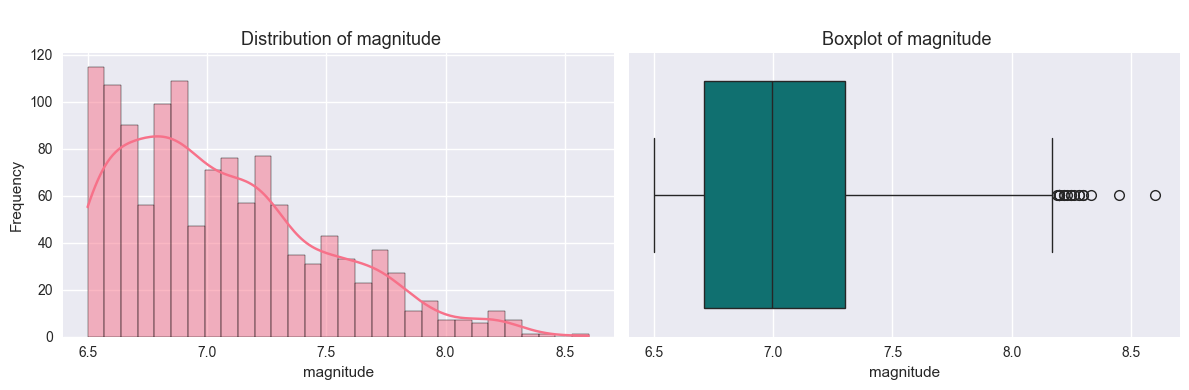

magnitude is moderately skewed.
Feature: depth
Skewness: 4.272
Kurtosis: 18.542


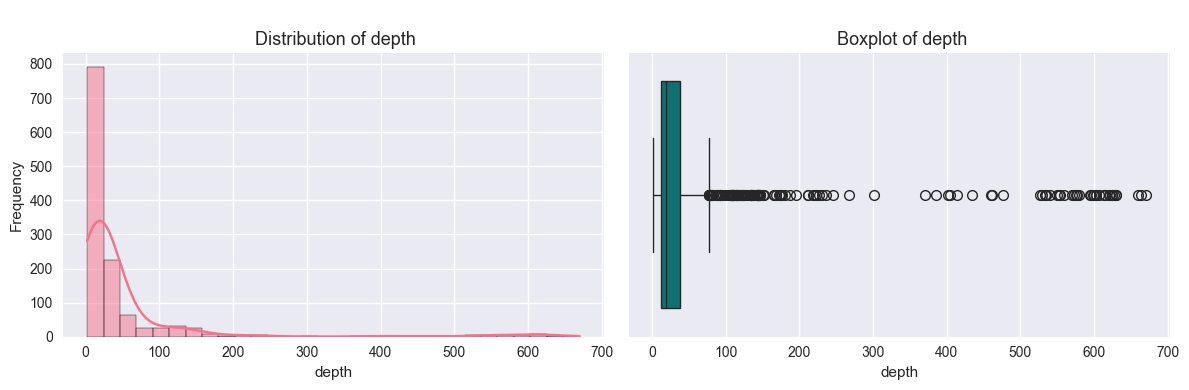


 depth is highly skewed. Consider log or Box-Cox transformation.
Feature: cdi
Skewness: -1.775
Kurtosis: 2.640


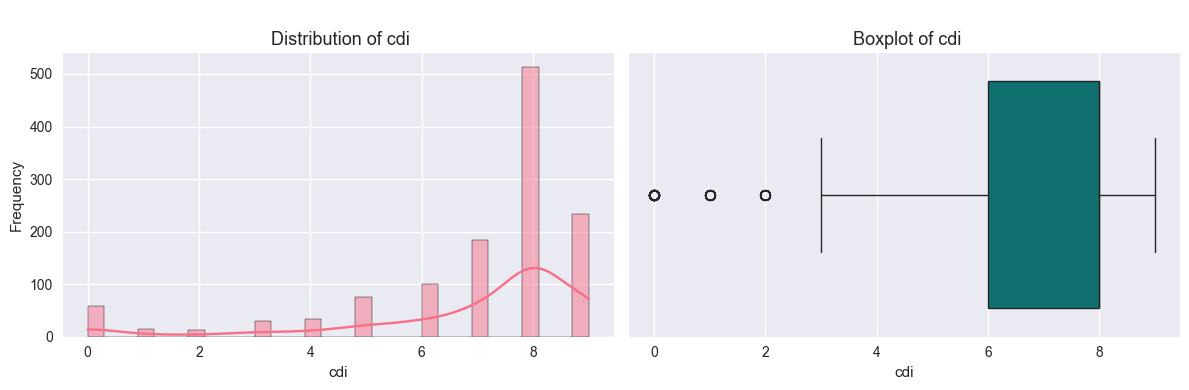


 cdi is highly skewed. Consider log or Box-Cox transformation.
Feature: mmi
Skewness: -1.220
Kurtosis: 1.353


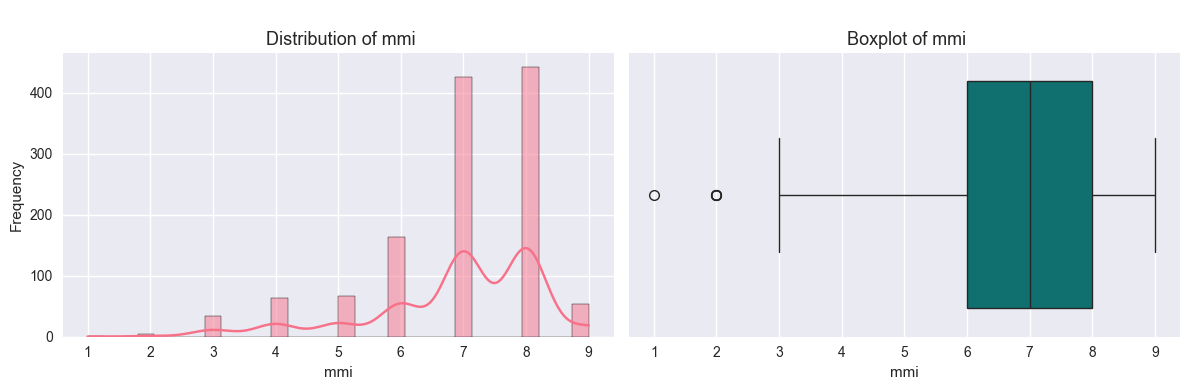


 mmi is highly skewed. Consider log or Box-Cox transformation.
Feature: sig
Skewness: 0.007
Kurtosis: -0.792


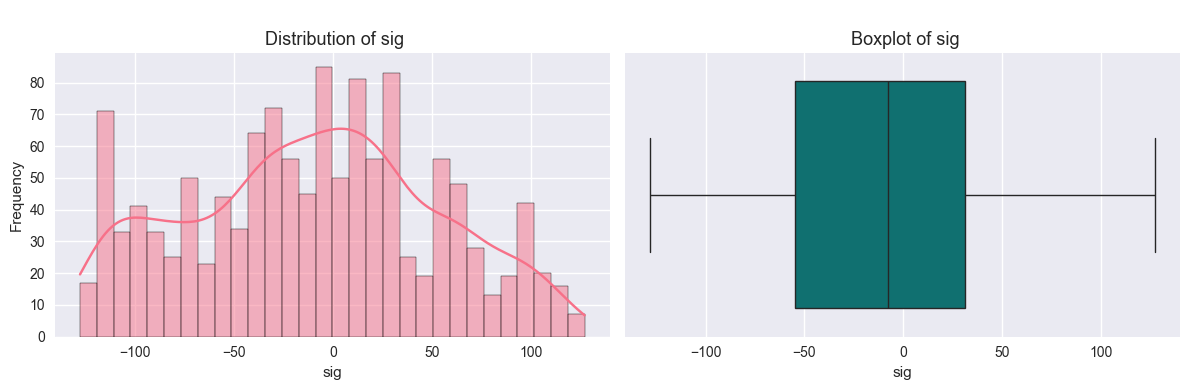

sig is fairly symmetric.


In [16]:
num_features = list(df.select_dtypes(include=["float64","int64"]).columns)
for col in num_features:
    numeric_analysis(df, col)

In [17]:
# lets reclasify our target value
df = df.replace({"alert":{"green":1, "yellow":2, "orange":3,"red":4}})

In [18]:
df["alert"]

0       1
1       1
2       1
3       1
4       1
       ..
1295    2
1296    2
1297    2
1298    2
1299    2
Name: alert, Length: 1256, dtype: int64

In [19]:
def correlation_with_target(df, target_col, figsize=(10,2)):
    """
    Plots a heatmap showing correlation of each numeric feature against target_col.
    Returns a Series of correlations (sorted by absolute magnitude).
    """
    # Keep only numeric columns
    numeric_df = df.select_dtypes(include='number').copy()
    if target_col not in numeric_df.columns:
        raise ValueError(f"Target column '{target_col}' must be numeric and present in the dataframe.")

    # compute correlations of every numeric column with the target
    corrs = numeric_df.corrwith(numeric_df[target_col]).drop(target_col)

    corrs_df = corrs.to_frame(name='corr').T  # shape (1, n)

    plt.figure(figsize=figsize)
    sns.heatmap(
        corrs_df,
        annot=True,
        fmt=".3f",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'orientation': 'vertical', 'shrink':0.7}
    )
    plt.xticks(rotation=45, ha='right')
    plt.yticks([0], [target_col], rotation=0)
    plt.title(f'Correlation of numeric features with {target_col}', fontsize=12)
    plt.tight_layout()
    plt.show()

    # return sorted correlations for downstream use
    return corrs.reindex(corrs.abs().sort_values(ascending=False).index)

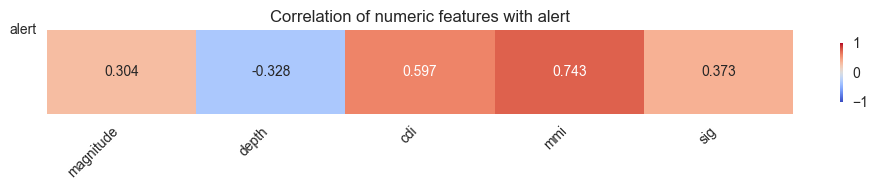

In [20]:
corr_series = correlation_with_target(df, "alert",figsize=(10,2))

In [21]:
def reg_plot(data, col1, col2):
    """
    Visualise the relationship between numerical columns using regplot
    """

    """
    Params
    ----------
    data : pd.DataFrame
        Data containing numerical features
    col1 : str
        Name of the first column
    col2 : str
        Name of the second column
    """
    try:
        if col1 in data.columns and col2 in data.columns:
            corr, pvalue = stats.pearsonr(data[col1], data[col2])
            ax = sns.regplot(data = data, x = col1, y = col2, scatter_kws = {'alpha':0.4}, line_kws = {'color': 'red'}, color = "blue")
            ax.set_xlabel(col1)
            ax.set_ylabel(col2)
            ax.set_title(f"{col1} vs {col2} \nCorrelation: {corr:.3f}, p value: {pvalue:.3f}")
            plt.show()
        else:
            raise ValueError("Columns not found in data")
    except ValueError as e:
        print(e)

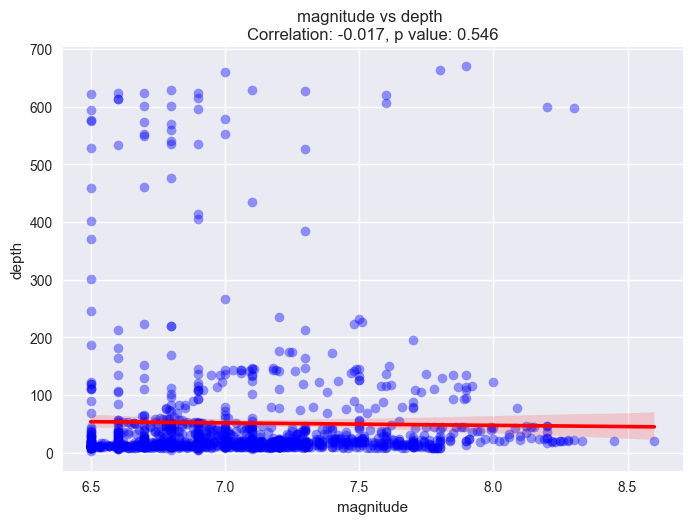

In [22]:
reg_plot(df, df.columns[0],df.columns[1])

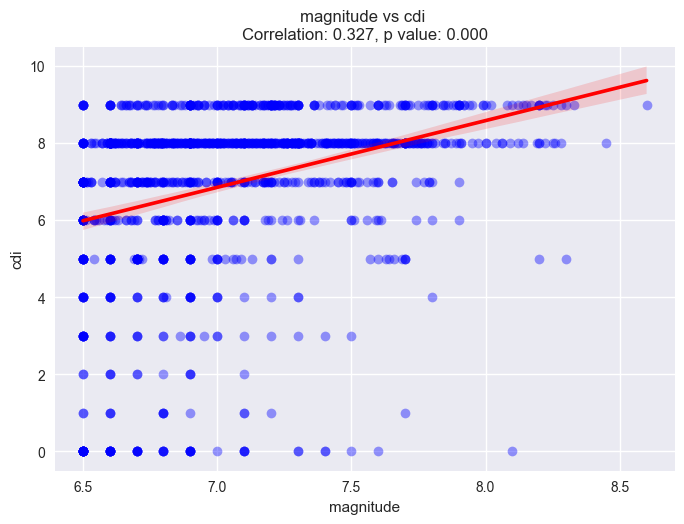

In [23]:
reg_plot(df, df.columns[0],df.columns[2])

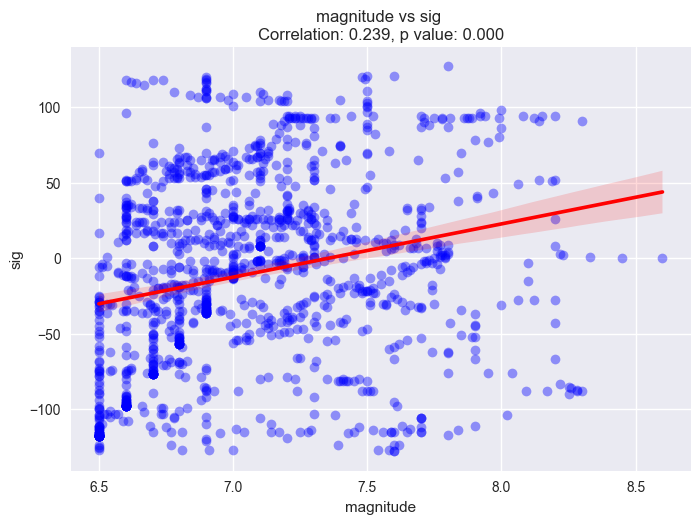

In [24]:
reg_plot(df, df.columns[0],df.columns[4])

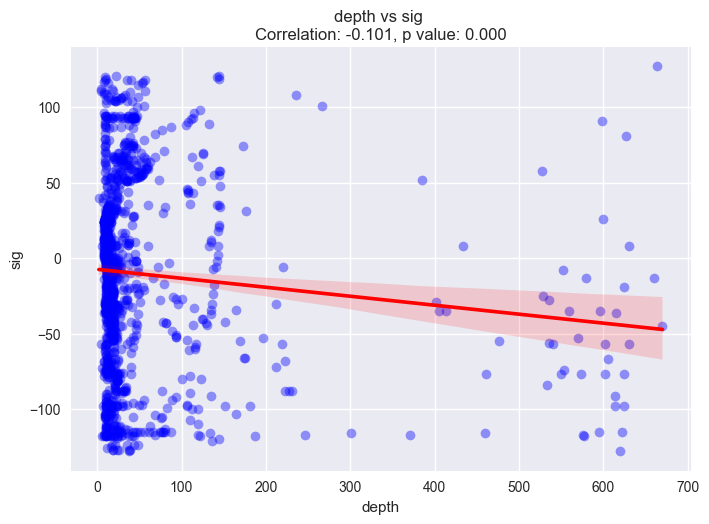

In [25]:
reg_plot(df, df.columns[1],df.columns[4])

In [26]:
#split data into target and features
y = df["alert"]
X = df.drop("alert", axis=1)

In [27]:
X

,magnitude,depth,cdi,mmi,sig
0,7.00,14.0,8.0,7.0,0.0
1,6.90,25.0,4.0,4.0,-33.0
2,7.00,579.0,3.0,3.0,-13.0
3,7.30,37.0,5.0,5.0,65.0
4,6.60,624.0,0.0,2.0,-98.0
...,...,...,...,...,...
1295,6.87,11.0,9.0,7.0,13.0
1296,7.85,93.0,8.0,6.0,-51.0
1297,7.48,142.0,7.0,6.0,120.0
1298,7.04,51.0,7.0,6.0,-115.0


In [28]:
#scaled the features
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
#split data into train and test set
X_t, X_test,y_t, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [30]:
# split train set into train and validation set
X_train,X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.2, random_state=42) 

In [31]:
#intantiate model
model = LogisticRegression()
#train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [32]:
#evalaute the model
acuracy = accuracy_score(y_pred,y_test)
print(f"Accuracy Score: {acuracy}")
precision = precision_score(y_pred,y_test, average="macro")
print(f"Precision Score: {precision}")
f1 = f1_score(y_pred,y_test, average="macro")
print(f"F1 Score: {f1}")
recall = recall_score(y_pred,y_test, average="macro")
print(f"Recall Score: {recall}")


Accuracy Score: 0.6706349206349206
Precision Score: 0.6658630325154298
F1 Score: 0.6578268432921782
Recall Score: 0.6717787361380039


Text(0.5, 1.0, 'Confusion Matrix')

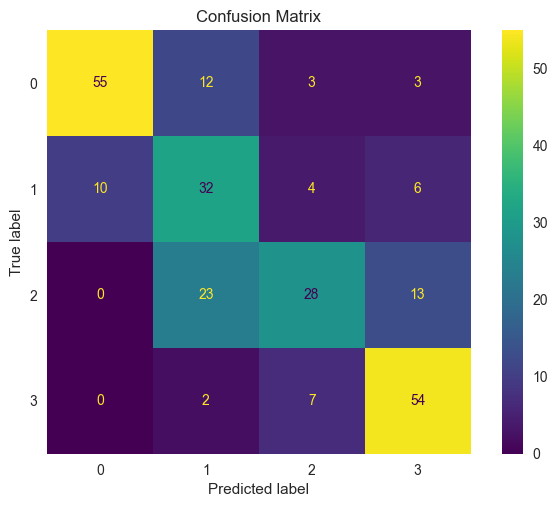

In [33]:
# plot confusuion matrix
cm= confusion_matrix(y_test,y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.grid()
plt.title(f"Confusion Matrix")

In [34]:
#intantiate model
model_rf = RandomForestClassifier()
#train the model
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)


In [35]:
#evalaute the model
acuracy_rf = accuracy_score(y_pred_rf,y_test)
print(f"Accuracy Score: {acuracy_rf}")
precision_rf = precision_score(y_pred_rf,y_test, average="macro")
print(f"Precision Score: {precision_rf}")
f1_rf = f1_score(y_pred_rf,y_test, average="macro")
print(f"F1 Score: {f1_rf}")
recall_rf = recall_score(y_pred_rf,y_test, average="macro")
print(f"Recall Score: {recall_rf}")

Accuracy Score: 0.9087301587301587
Precision Score: 0.9125011629827554
F1 Score: 0.9081970732269339
Recall Score: 0.9095958164239676


In [36]:
print(f"Evaluate The best Model:{classification_report(y_test,y_pred_rf)}")

Evaluate The best Model:              precision    recall  f1-score   support

           1       0.94      0.82      0.88        73
           2       0.81      0.92      0.86        52
           3       0.89      0.98      0.93        64
           4       1.00      0.92      0.96        63

    accuracy                           0.91       252
   macro avg       0.91      0.91      0.91       252
weighted avg       0.91      0.91      0.91       252



Text(0.5, 1.0, 'Confusion Matrix')

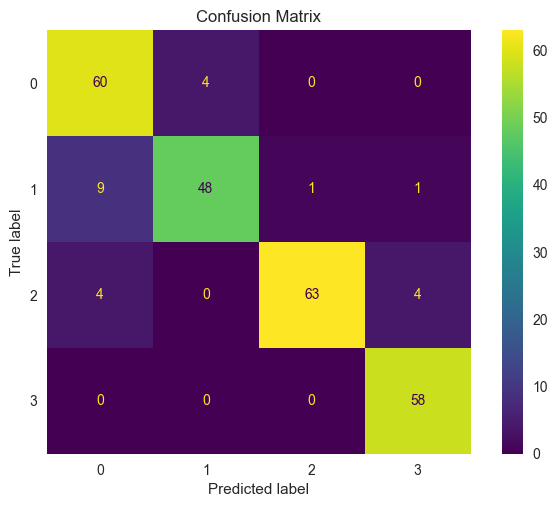

In [37]:
# plot confusuion matrix
cm_rf= confusion_matrix(y_pred_rf, y_test)
display = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
display.plot()
plt.grid()
plt.title(f"Confusion Matrix")

In [38]:
#plot the classification report
report = classification_report(y_pred_rf, y_test)
print(f"Classification Report: {report}")

Classification Report:               precision    recall  f1-score   support

           1       0.82      0.94      0.88        64
           2       0.92      0.81      0.86        59
           3       0.98      0.89      0.93        71
           4       0.92      1.00      0.96        58

    accuracy                           0.91       252
   macro avg       0.91      0.91      0.91       252
weighted avg       0.91      0.91      0.91       252



In [39]:
#intantiate model
model = DecisionTreeClassifier()
#train the model
model.fit(X_train, y_train)
y_pred_dt = model.predict(X_test)

In [40]:
#evalaute the model
acuracy_dt = accuracy_score(y_pred_dt,y_test)
print(f"Accuracy Score: {acuracy_dt}")
precision_dt = precision_score(y_pred_dt,y_test, average="macro")
print(f"Precision Score: {precision_dt}")
f1_dt = f1_score(y_pred_dt,y_test, average="macro")
print(f"F1 Score: {f1_dt}")
recall_dt = recall_score(y_pred_dt,y_test, average="macro")
print(f"Recall Score: {recall_dt}")

Accuracy Score: 0.876984126984127
Precision Score: 0.8790281671809925
F1 Score: 0.8750578649159899
Recall Score: 0.8753348214285714


Text(0.5, 1.0, 'Confusion Matrix')

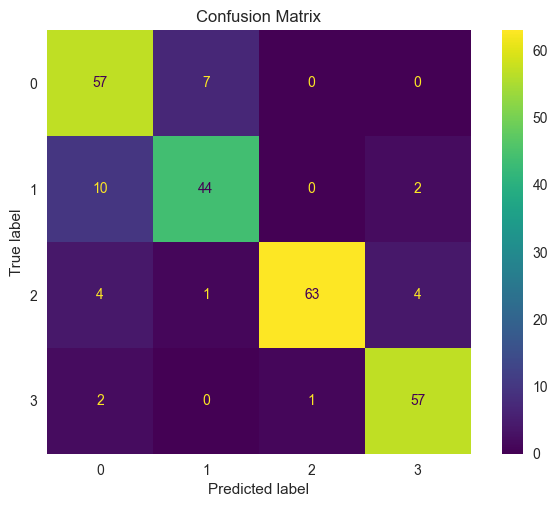

In [41]:
# plot confusuion matrix
cm_dt= confusion_matrix(y_pred_dt, y_test)
display = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
display.plot()
plt.grid()
plt.title(f"Confusion Matrix")

In [42]:
# let's fine tune the best model
model_rfy = RandomForestClassifier()
model_rfy.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [43]:
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [44]:
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42),param_distributions=param_dist, cv=5,n_jobs=-1, verbose=1)
random_search.fit(X_val,y_val)
print(f"Best Params:{random_search.best_params_}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Params:{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}


In [45]:
#get the the model with the best params
best_model = random_search.best_estimator_
cv_scores= cross_val_score(best_model,X_scaled,y)
print(f"cross val scores:{cv_scores}")
print(f"mean cross val scores:{cv_scores.mean()}")

cross val scores:[0.87301587 0.89641434 0.87649402 0.90836653 0.92031873]
mean cross val scores:0.8949218997027761


In [46]:
#get the best model
y_pred_rfy = best_model.predict(X_test)
print(f"Evaluate The best Model:{classification_report(y_test,y_pred_rfy)}")

Evaluate The best Model:              precision    recall  f1-score   support

           1       0.90      0.78      0.84        73
           2       0.66      0.77      0.71        52
           3       0.77      0.73      0.75        64
           4       0.87      0.92      0.89        63

    accuracy                           0.80       252
   macro avg       0.80      0.80      0.80       252
weighted avg       0.81      0.80      0.80       252



In [47]:
#save the best model and scaler
joblib.dump(scaler,"scaler.pkl")
joblib.dump(model_rf, "model.pkl")

['model.pkl']

In [48]:
df.dtypes

magnitude    float64
depth        float64
cdi          float64
mmi          float64
sig          float64
alert          int64
dtype: object